In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
time = np.linspace(0, 7, 2000)
time

array([0.00000000e+00, 3.50175088e-03, 7.00350175e-03, ...,
       6.99299650e+00, 6.99649825e+00, 7.00000000e+00])

In [3]:
viral_load = lambda A, B, alpha, beta: A * np.exp(-alpha*time) + B * np.exp(-beta*time)
exp_t = lambda t: np.exp(-t)


f_1 = lambda A, alpha: A * np.exp(-alpha*time)
f_2 = lambda B, beta: B * np.exp(-beta*time)

In [4]:
A = 1.0
B = -1.5
alpha =  1.5
beta = .1


data = f_1(A, alpha) + f_2(B, beta)

data2 = viral_load(A, B, alpha, beta)

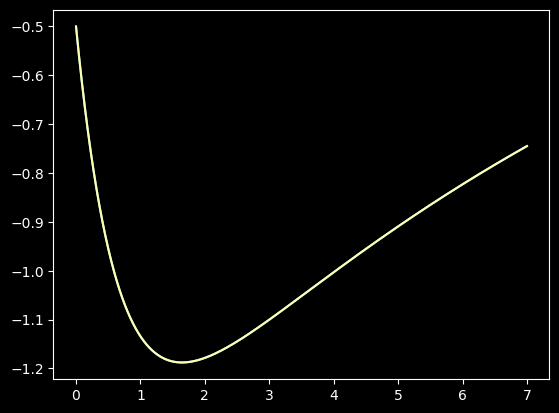

In [5]:
plt.plot(time, data)
plt.plot(time, data2)

In [6]:
np.exp(1)

2.718281828459045

In [7]:
!dir

 Volume in Laufwerk C: hat keine Bezeichnung.
 Volumeseriennummer: A055-9EBC

 Verzeichnis von C:\Users\jensm\Desktop\local\jupyter\physical_modeling\HIVexample

06/19/2025  08:01 PM    <DIR>          .
06/17/2025  03:18 PM    <DIR>          ..
06/18/2025  11:01 PM    <DIR>          .ipynb_checkpoints
06/19/2025  08:01 PM            63,674 first_lab.ipynb
06/17/2025  02:53 PM               251 HIVseries.csv
06/17/2025  02:53 PM               438 HIVseries.mat
06/17/2025  02:53 PM               336 HIVseries.npy
06/17/2025  02:53 PM               650 HIVseries.npz
06/17/2025  02:53 PM               594 README.txt
               6 Datei(en),         65,943 Bytes
               3 Verzeichnis(se),  2,986,717,184 Bytes frei


In [8]:
_datadir = 'HIVseries.csv'

In [9]:
dataset = np.loadtxt(_datadir, delimiter=',')

In [10]:
dataset

array([[0.0000e+00, 1.0610e+05],
       [8.3100e-02, 9.3240e+04],
       [1.4650e-01, 1.6672e+05],
       [2.5870e-01, 1.5378e+05],
       [4.8280e-01, 1.1880e+05],
       [7.4480e-01, 1.1690e+05],
       [9.8170e-01, 1.0957e+05],
       [1.2563e+00, 1.1135e+05],
       [1.4926e+00, 7.4388e+04],
       [1.7299e+00, 8.3291e+04],
       [1.9915e+00, 6.6435e+04],
       [3.0011e+00, 3.5408e+04],
       [4.0109e+00, 2.1125e+04],
       [5.0090e+00, 2.0450e+04],
       [5.9943e+00, 1.5798e+04],
       [7.0028e+00, 4.7852e+03]])

In [11]:
dataset.shape

(16, 2)

In [12]:
dataset[1][0]

0.0831

In [13]:
dataset[1, 0]

0.0831

In [14]:
w = np.load("HIVseries.npz")

In [15]:
w

NpzFile 'HIVseries.npz' with keys: time_in_days, viral_load

In [16]:
w['time_in_days']

array([0.    , 0.0831, 0.1465, 0.2587, 0.4828, 0.7448, 0.9817, 1.2563,
       1.4926, 1.7299, 1.9915, 3.0011, 4.0109, 5.009 , 5.9943, 7.0028])

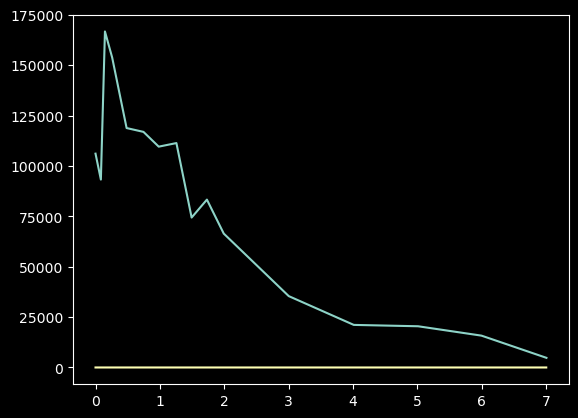

In [17]:
plt.plot(dataset[:, 0], dataset[:, 1])
plt.plot(time, data)

In [22]:
W = lambda A, τ, t: A * (np.exp(-t/τ) - 1 + (t/τ))

A = 1
τ = 1
time = np.linspace(0, 2, 2000)
W(A, τ, time)

array([0.00000000e+00, 5.00333500e-07, 2.00066683e-06, ...,
       1.13360536e+00, 1.13447025e+00, 1.13533528e+00])

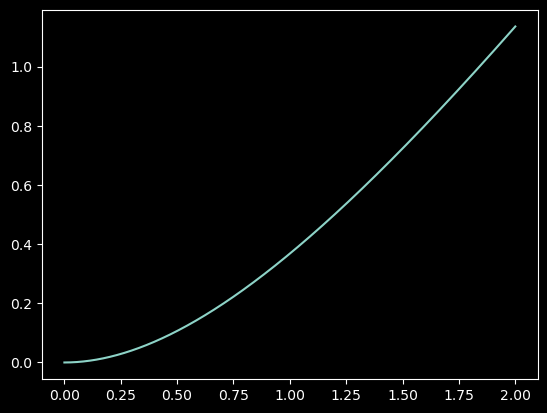

In [23]:
plt.plot(time, W(A, τ, time))

In [26]:
def rotate_vector(vector, angle):
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle),  np.cos(angle)]])
    return np.dot(rotation_matrix, vector)

In [27]:
vec = [1, 1]
theta = np.pi/2
r = rotate_vector(vec, theta)

r

array([-1.,  1.])

In [30]:
x, y = rotate_vector(vec, theta)
x, y

(-0.9999999999999999, 1.0)

In [33]:
def running_avg(x):
    y = np.zeros(len(x))
    current_sum = 0.0
    for i in range(len(x)):
        current_sum += x[i]
        y[i] = current_sum / (i + 1.0) 
    return y
    

In [34]:
x = np.arange(20)
running_avg(x)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])